# ⚖️ Handling Imbalanced Dataset

---

### 📘 What is an Imbalanced Dataset?

An **imbalanced dataset** happens when one class has **many more samples** than the other(s).

📊 **Example:**
| Class | Count |
|--------|--------|
| 0 (Normal) | 950 |
| 1 (Fraud) | 50 |

Here, only 5% of the data belongs to the minority class → this is **highly imbalanced**.

---

### ⚠️ Why It’s a Problem?

If we train a model directly on this data:
- The model learns to **always predict the majority class**.
- Accuracy looks high (95%), but the model **fails to detect frauds or rare events**.

🧠 **Accuracy is misleading** —  
instead, we use metrics like **Precision**, **Recall**, **F1-score**, and **AUC-ROC**.

---

### 📊 Key Metrics (for clarity)

| Metric | Formula | Meaning |
|----------|----------|-----------|
| **Precision** | $$( \text{Precision} = \frac{TP}{TP + FP} )$$ | How many predicted positives were correct |
| **Recall (Sensitivity)** | $$( \text{Recall} = \frac{TP}{TP + FN} )$$ | How many actual positives were found |
| **F1-Score** | $$( F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} )$$ | Balance between Precision & Recall |

---

## 🧩 Techniques to Handle Imbalanced Data

There are **two main data-level techniques** to handle imbalance 👇

---

## 1️⃣ Downsampling (Undersampling the Majority Class)

🪓 **Definition:**  
Reduce the number of samples from the **majority class** to match the minority class size.

📘 **Example:**
| Class | Before | After |
|--------|---------|--------|
| 0 (Majority) | 950 | 50 |
| 1 (Minority) | 50 | 50 |

✅ **Pros:**
- Simple and fast  
- Avoids data duplication  

⚠️ **Cons:**
- May lose important information  
- Not ideal if dataset is small  

📐 **Formula:**
$$[
n_{majority\_new} = n_{minority}
]$$

💡 **Best Used When:**  
You have a **large dataset** and can afford to drop samples.

---

## 2️⃣ Upsampling (Oversampling the Minority Class)

📈 **Definition:**  
Increase the number of samples in the **minority class** by duplicating or generating new ones.

📘 **Example:**
| Class | Before | After |
|--------|---------|--------|
| 0 (Majority) | 950 | 950 |
| 1 (Minority) | 50 | 950 |

✅ **Pros:**
- No data loss  
- Improves minority representation  

⚠️ **Cons:**
- Can cause **overfitting** (model memorizes duplicated samples)  
- Training time increases  

📐 **Formula:**
$$[
n_{minority\_new} = n_{majority}
]$$

💡 **Best Used When:**  
You have **fewer minority samples** and want to balance classes without losing data.

---

### 🔹 Summary: Upsampling vs Downsampling

| Technique | What It Does | When to Use | Advantage | Drawback |
|------------|---------------|-------------|------------|-----------|
| **Downsampling** | Removes samples from majority class | Dataset is large | Fast, simple | Data loss |
| **Upsampling** | Duplicates or generates minority samples | Minority is small | No info loss | Overfitting risk |

---

### 💡 Simple Analogy

Imagine a class with:
- 90 boys 👦  
- 10 girls 👧  

If you want balance:
- **Downsampling:** randomly remove some boys until 10 remain  
- **Upsampling:** duplicate or synthetically generate girls until they become 90  

Both give you a 50–50 class ratio 🎯

---

### ⚙️ In Practice

Most modern libraries like `imbalanced-learn` use:
- **RandomUnderSampler** → downsampling  
- **RandomOverSampler** → upsampling  
- **SMOTE / ADASYN** → advanced upsampling (synthetic data)

---

✅ **In Short:**

> “Handling imbalance = Either reduce the big class or boost the small one.”  
> — **Downsample** to trim majority 🔻  
> — **Upsample** to grow minority 🔺


## ⚙️ Creating a Synthetic Imbalanced Dataset  

Before we apply upsampling or downsampling,  
let’s first **create a simple dataset** with two classes:
- **Class 0 (Majority)** → 90% of the data  
- **Class 1 (Minority)** → 10% of the data  

This small simulation helps us easily visualize and understand  
how balancing techniques actually work.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 🎲 Set random seed for reproducibility (so results are same every run)
np.random.seed(123)

# 📊 Define total samples and class ratio
n_samples = 1000           # total number of samples
class_0_ratio = 0.9        # 90% belong to majority class (Class 0)
n_class_0 = int(n_samples * class_0_ratio)  # number of Class 0 samples
n_class_1 = n_samples - n_class_0           # remaining are Class 1 samples

# Display class counts
n_class_0, n_class_1

(900, 100)

✅ **Output Explanation:**
- Class 0 → 900 samples (Majority class)  
- Class 1 → 100 samples (Minority class)  

This means our dataset is **highly imbalanced (9:1 ratio)**,  
which perfectly mimics a real-world scenario like:
- Fraud vs. Non-Fraud  
- Disease vs. No Disease  
- Spam vs. Non-Spam  

Next, we’ll create the actual **feature and label columns**  
to complete the dataset.

## 🧩 Create My DataFrame with an Imbalanced Dataset

We’ll now create a **synthetic imbalanced dataset** with:
- Two numerical features → `feature_1`, `feature_2`
- One target column → `target`

**Goal:**  
Simulate a real-world classification dataset where:
- Class `0` (majority) makes up 90% of samples  
- Class `1` (minority) makes up 10% of samples  

Each feature will follow a **normal distribution**,  
but with **different means (loc)** to make the two classes more separable.


In [3]:
# 🧮 Create DataFrame for Class 0 (Majority Class)
#   - feature_1 and feature_2 are drawn from a normal distribution
#   - mean (loc) = 0 → centered around 0
#   - std deviation (scale) = 1 → standard normal spread
#   - target column is filled with label '0'
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

# 🧮 Create DataFrame for Class 1 (Minority Class)
#   - mean (loc) = 2 → shifted to the right of Class 0
#   - std deviation (scale) = 1 → same spread as Class 0
#   - target column is filled with label '1'
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

# 🧩 Combine both DataFrames into a single dataset
#   - axis=0 means stack them vertically (add more rows)
#   - reset_index(drop=True) cleans up the index after merging
df = pd.concat([class_0, class_1], axis=0).reset_index(drop=True)

# 👀 Display the first few rows to inspect the dataset
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [4]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [5]:
!pip install scikit-learn

## 🔼 Upsampling (Random Oversampling) & 🔽 Downsampling (Random Undersampling)

We demonstrate two simple resampling approaches to balance an imbalanced dataset:
- **Upsampling**: duplicate minority-class samples until it matches majority class size.
- **Downsampling**: remove (randomly) samples from majority class until it matches minority class size.

We use `sklearn.utils.resample` for reproducible, quick sampling.


In [6]:
from sklearn.utils import resample

In [7]:
# 🎲 reproducibility
np.random.seed(123)

# ----- (re)create the imbalanced dataset used earlier -----
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

# Class 0 (majority): loc=0, scale=1
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

# Class 1 (minority): loc=2, scale=1
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

# Combined original imbalanced DataFrame
df = pd.concat([class_0, class_1], axis=0).reset_index(drop=True)

# ---- Quick check: original class counts ----
print("Original class distribution:")
print(df['target'].value_counts())
print()

Original class distribution:
target
0    900
1    100
Name: count, dtype: int64



In [8]:
# -----------------------
# 1) UPSAMPLING (Oversample minority to match majority)
# -----------------------
# - We take the minority subset and randomly resample (with replacement)
#   to make its size equal to the majority class size.
# - replace=True allows the same row to be picked multiple times (duplication).
df_minority = df[df['target'] == 1]   # minority class
df_majority = df[df['target'] == 0]   # majority class

# create an upsampled minority dataframe
df_minority_upsampled = resample(
    df_minority,
    replace=True,                       # sample with replacement (allow duplicates)
    n_samples=len(df_majority),         # match number of majority samples
    random_state=42                     # reproducible result
)

# combine majority with upsampled minority
df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0).reset_index(drop=True)

# verify result
print("After Upsampling class distribution:")
print(df_upsampled['target'].value_counts())
print()


After Upsampling class distribution:
target
0    900
1    900
Name: count, dtype: int64



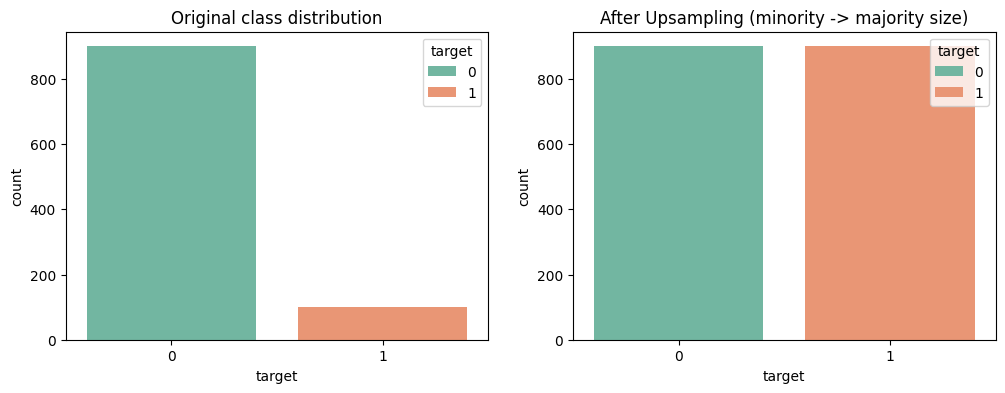

In [9]:
# Visualize before vs after (upsampling)
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x='target', hue='target', data=df, ax=axes[0], palette='Set2')
axes[0].set_title("Original class distribution")
sns.countplot(x='target', hue='target', data=df_upsampled, ax=axes[1], palette='Set2')
axes[1].set_title("After Upsampling (minority -> majority size)")
plt.show()


In [10]:
# -----------------------
# 2) DOWNSAMPLING (Undersample majority to match minority)
# -----------------------
# - We randomly sample the majority class WITHOUT replacement to the minority size.
# - replace=False ensures we do not pick the same majority sample twice.
df_minority = df[df['target'] == 1]   # minority (unchanged)
df_majority = df[df['target'] == 0]   # majority

df_majority_downsampled = resample(
    df_majority,
    replace=False,                      # sample without replacement (no duplicates)
    n_samples=len(df_minority),         # reduce majority to minority size
    random_state=42
)

# combine downsampled majority with original minority
df_downsampled = pd.concat([df_majority_downsampled, df_minority], axis=0).reset_index(drop=True)

# verify result
print("After Downsampling class distribution:")
print(df_downsampled['target'].value_counts())
print()


After Downsampling class distribution:
target
0    100
1    100
Name: count, dtype: int64



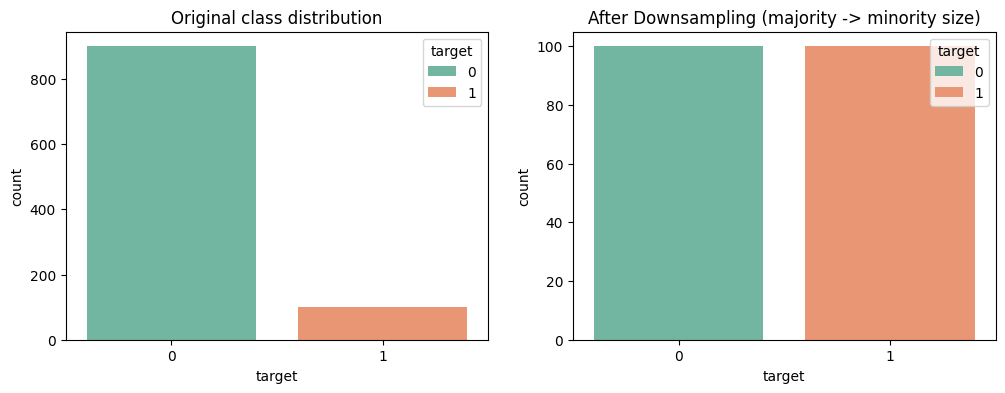

In [11]:
# Visualize before vs after (downsampling)
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x='target', hue='target', data=df, ax=axes[0], palette='Set2')
axes[0].set_title("Original class distribution")
sns.countplot(x='target', hue='target', data=df_downsampled, ax=axes[1], palette='Set2')
axes[1].set_title("After Downsampling (majority -> minority size)")
plt.show()
